In [1]:
from asgardpy.analysis import AsgardpyAnalysis
from asgardpy.config import AsgardpyConfig

from gammapy.maps import Map
from gammapy.modeling.models import Models
from gammapy.modeling import Fit
from gammapy.estimators import FluxPointsEstimator
from gammapy.datasets import Datasets

import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
import logging

In [2]:
log = logging.getLogger("test DL4 steps")

In [3]:
base_dir = "/fefs/aswg/workspace/chaitanya.priyadarshi/"
config_file = base_dir + "analyze_crab_test_Nov2020.yaml"

In [4]:
config = AsgardpyConfig()

In [5]:
%%time
config_main = config.read(config_file)

CPU times: user 33.4 ms, sys: 1.29 ms, total: 34.7 ms
Wall time: 32.5 ms


In [6]:
for g in config_main.general:
    print(g)

('log', LogConfig(level='info', filename=None, filemode=None, format=None, datefmt=None))
('outdir', '/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/Crab/v09x/tailcut84/DL3/interp_irf_en_dep/nsb_tuning/geff_70/teff_70/20220518_dec2276/perf_paper/interp_w_23/joint_lat_lst/')
('n_jobs', 1)
('steps', [<AnalysisStepEnum.datasets_3d: 'datasets-3d'>, <AnalysisStepEnum.datasets_1d: 'datasets-1d'>, <AnalysisStepEnum.fit: 'fit'>, <AnalysisStepEnum.flux_points: 'flux-points'>])
('overwrite', True)
('stacked_dataset', True)


# Steps mentioned in the main config file

In [7]:
config_main.general.steps

[<AnalysisStepEnum.datasets_3d: 'datasets-3d'>,
 <AnalysisStepEnum.datasets_1d: 'datasets-1d'>,
 <AnalysisStepEnum.fit: 'fit'>,
 <AnalysisStepEnum.flux_points: 'flux-points'>]

In [8]:
for c in config_main.target:
    print(c)

('source_name', 'Crab')
('sky_position', SkyCoordConfig(frame=<FrameEnum.icrs: 'icrs'>, lon=<Angle 83.63308333 deg>, lat=<Angle 22.0145 deg>))
('use_uniform_position', True)
('models_file', None)
('extended', False)
('components', SkyModelComponent(name='Crab', type='SkyModel', spectral=SpectralModelConfig(model_name='LogParabola', type='LogParabolaSpectralModel', parameters=[ModelParams(name='amplitude', value=1e-09, unit='cm-2 s-1 TeV-1', error=1.5e-10, min=1e-13, max=0.01, frozen=False), ModelParams(name='reference', value=0.01, unit='TeV', error=0.0, min=0.0001, max=100.0, frozen=True), ModelParams(name='alpha', value=2.0, unit='', error=0.1, min=0.5, max=5.0, frozen=False), ModelParams(name='beta', value=0.01, unit='', error=0.001, min=1e-06, max=1.0, frozen=False)], ebl_abs=EBLAbsorptionModel(model_name='dominguez', type='EBLAbsorptionNormSpectralModel', redshift=0.0, alpha_norm=1.0)), spatial=SpatialModelConfig(model_name=None, type=None, parameters=[ModelParams(name=None, value

# Datasets informations

In [9]:
for cc in config_main.dataset3d:
    print(cc)

('type', <ReductionTypeEnum.cube: '3d'>)
('instruments', [Dataset3DBaseConfig(name='Fermi-LAT', io=[InputConfig(type='lat', input_dir=PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/Crab/v09x/tailcut84/DL3/interp_irf_en_dep/nsb_tuning/geff_70/teff_70/20220518_dec2276/perf_paper/interp_w_23/joint_lat_lst/LAT/Nov2020'), glob_pattern={'events': '*MkTime.fits*', 'edisp': '*eDRM.fits*', 'xml_model': '*out.xml', 'exposure': '*BinnedMap.fits*', 'psf': '*psf.fits*'}), InputConfig(type='lat-aux', input_dir=PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/diffuse_models'), glob_pattern={'diffuse': 'gll_iem_v07.fits*', 'iso': 'iso_P8R3_SOURCE_V3_*.txt'})], dataset_info=Dataset3DInfoConfig(name='Fermi-LAT', key=['FRONT', 'BACK'], map_selection=[<MapSelectionEnum.counts: 'counts'>, <MapSelectionEnum.exposure: 'exposure'>, <MapSelectionEnum.background: 'background'>, <MapSelectionEnum.psf: 'psf'>, <MapSelectionEnum.edisp: 'edisp'>], obs_time=TimeIntervalsConfig(format=<TimeForm

In [10]:
for cc in config_main.dataset1d:
    print(cc)

('type', <ReductionTypeEnum.spectrum: '1d'>)
('instruments', [Dataset1DBaseConfig(name='LST-1', io=[InputConfig(type='lst-1', input_dir=PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/Crab/v09x/tailcut84/DL3/interp_irf_en_dep/nsb_tuning/geff_70/teff_70/20221027_v0.9.9_crab_tuned/cos_zen/joint_fit/LST1/Nov2020'), glob_pattern={'dl3': '202*/dl3*fits'})], dataset_info=Dataset1DInfoConfig(name='LST-1', geom=GeomConfig(wcs=WcsConfig(skydir=SkyCoordConfig(frame=None, lon=None, lat=None), binsize=<Angle 0.02 deg>, final_frame=FinalFrameConfig(width=<Angle 5. deg>, height=<Angle 5. deg>), binsize_irf=<Angle 0.2 deg>), selection=SelectionConfig(offset_max=<Angle 2.5 deg>), axes=EnergyAxesConfig(energy=EnergyAxisConfig(min=<Quantity 10. GeV>, max=<Quantity 100. TeV>, nbins=5), energy_true=EnergyAxisConfig(min=<Quantity 10. GeV>, max=<Quantity 100. TeV>, nbins=5))), observation=ObservationsConfig(obs_ids=[], obs_file=None, obs_time=TimeIntervalsConfig(format=<TimeFormatEnum.is



# DL4 step information

In [11]:
for cc in config_main.fit_params:
    print(cc)

('fit_range', EnergyRangeConfig(min=<Quantity 100. MeV>, max=<Quantity 40. TeV>))
('backend', <BackendEnum.minuit: 'minuit'>)
('optimize_opts', {})
('covariance_opts', {})
('confidence_opts', {})
('store_trace', True)


In [12]:
for cc in config_main.flux_points_params:
    print(cc)

('parameters', {'selection_optional': 'all'})


In [13]:
%%time
analysis = AsgardpyAnalysis(config_main)

Setting logging config: {'level': 'INFO', 'filename': None, 'filemode': None, 'format': None, 'datefmt': None}


CPU times: user 1.49 ms, sys: 567 µs, total: 2.06 ms
Wall time: 1.52 ms


In [14]:
analysis

# Prepare the dataset

In [15]:
instruments_list_3d = config_main.dataset3d.instruments
print(len(instruments_list_3d), "number of 3D dataset information provided")

config_3d_dataset = instruments_list_3d[0]
print(f"Instrument selected is {config_3d_dataset.name}")

1 number of 3D dataset information provided
Instrument selected is Fermi-LAT


In [16]:
instruments_list_1d = config_main.dataset1d.instruments
print(len(instruments_list_1d), "number of 1D dataset information provided")

config_1d_dataset = instruments_list_1d[0]
print(f"Instrument selected is {config_1d_dataset.name}")

1 number of 1D dataset information provided
Instrument selected is LST-1


In [17]:
key_names = config_3d_dataset.dataset_info.key
print(f"The list of different keys or modes of observations for the selected instrument are {key_names}")

The list of different keys or modes of observations for the selected instrument are ['FRONT', 'BACK']


# Run each Dataset nD Generation step

In [18]:
%%time
analysis.run(["datasets-3d"])

1 number of 3D Datasets given
The different keys used: ['FRONT', 'BACK']
The list of DL3 event files for LAT selected: [PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/Crab/v09x/tailcut84/DL3/interp_irf_en_dep/nsb_tuning/geff_70/teff_70/20220518_dec2276/perf_paper/interp_w_23/joint_lat_lst/LAT/Nov2020/Crab_LAT_Analysis_FRONTBACK_MkTime.fits')]
The list of Detector Response Matrix files for LAT selected: [PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/Crab/v09x/tailcut84/DL3/interp_irf_en_dep/nsb_tuning/geff_70/teff_70/20220518_dec2276/perf_paper/interp_w_23/joint_lat_lst/LAT/Nov2020/Crab_LAT_Analysis_FRONTBACK_LogParabola_eDRM.fits')]
The list of XML files for LAT selected: [PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/Crab/v09x/tailcut84/DL3/interp_irf_en_dep/nsb_tuning/geff_70/teff_70/20220518_dec2276/perf_paper/interp_w_23/joint_lat_lst/LAT/Nov2020/Crab_LogParabola_LAT_Analysis_out.xml')]
The list of Exposure Map files 

Other method of creating safe mask


The list of DL3 event files for LAT selected: [PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/Crab/v09x/tailcut84/DL3/interp_irf_en_dep/nsb_tuning/geff_70/teff_70/20220518_dec2276/perf_paper/interp_w_23/joint_lat_lst/LAT/Nov2020/Crab_LAT_Analysis_FRONTBACK_MkTime.fits')]
The list of Detector Response Matrix files for LAT selected: [PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/Crab/v09x/tailcut84/DL3/interp_irf_en_dep/nsb_tuning/geff_70/teff_70/20220518_dec2276/perf_paper/interp_w_23/joint_lat_lst/LAT/Nov2020/Crab_LAT_Analysis_FRONTBACK_LogParabola_eDRM.fits')]
The list of XML files for LAT selected: [PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/Crab/v09x/tailcut84/DL3/interp_irf_en_dep/nsb_tuning/geff_70/teff_70/20220518_dec2276/perf_paper/interp_w_23/joint_lat_lst/LAT/Nov2020/Crab_LogParabola_LAT_Analysis_out.xml')]
The list of Exposure Map files for LAT selected: [PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/

Using the exclusion mask to create a safe mask


Using the background region from config for exclusion mask


Other method of creating safe mask


Analysis Step datasets-3d completed


Using the exclusion mask to create a safe mask
CPU times: user 8.01 s, sys: 2.78 s, total: 10.8 s
Wall time: 10.8 s


## Display some results

In [19]:
print(analysis.datasets)

Datasets
--------

Dataset 0: 

  Type       : MapDataset
  Name       : Fermi-LAT_FRONT
  Instrument : 
  Models     : 

Dataset 1: 

  Type       : MapDataset
  Name       : Fermi-LAT_BACK
  Instrument : 
  Models     : 




In [20]:
print(analysis.final_model)

Models

Component 0: SkyModel

  Name                      : Crab
  Datasets names            : ['Fermi-LAT_FRONT', 'Fermi-LAT_BACK']
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude                     :   1.00e-09   +/- 1.5e-10 1 / (cm2 s TeV)
    reference             (frozen):      0.010       TeV         
    alpha                         :      2.000   +/-    0.10             
    beta                          :      0.010   +/-    0.00             
    alpha_norm            (frozen):      1.000                   
    redshift              (frozen):      0.000                   
    lon_0                 (frozen):      3.221       rad         
    lat_0                 (frozen):     -0.101       rad         

Component 1: SkyModel

  Name                      : 4FGL J0515.8+1527
  Datasets names            : ['Fermi-LAT_FRONT', 'Fermi-LAT_BACK']
  Spectral model type     

In [21]:
for m in analysis.final_model:
    print(m)

SkyModel

  Name                      : Crab
  Datasets names            : ['Fermi-LAT_FRONT', 'Fermi-LAT_BACK']
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude                     :   1.00e-09   +/- 1.5e-10 1 / (cm2 s TeV)
    reference             (frozen):      0.010       TeV         
    alpha                         :      2.000   +/-    0.10             
    beta                          :      0.010   +/-    0.00             
    alpha_norm            (frozen):      1.000                   
    redshift              (frozen):      0.000                   
    lon_0                 (frozen):      3.221       rad         
    lat_0                 (frozen):     -0.101       rad         


SkyModel

  Name                      : 4FGL J0515.8+1527
  Datasets names            : ['Fermi-LAT_FRONT', 'Fermi-LAT_BACK']
  Spectral model type       : LogParabolaSpectralModel
  Sp

In [22]:
print(analysis.instrument_spectral_info)

{'name': ['Fermi-LAT'], 'spectral_energy_ranges': [<Quantity [1.00000000e-01, 2.96193630e-01, 8.77306662e-01, 2.59852645e+00,
           7.69666979e+00, 2.27970456e+01, 6.75233969e+01, 2.00000000e+02] GeV>]}


In [23]:
for i, en_range in enumerate(analysis.instrument_spectral_info["spectral_energy_ranges"]):
    print(f"The spectral energy range to be used for dataset {i+1} is {en_range}")

The spectral energy range to be used for dataset 1 is [1.00000000e-01 2.96193630e-01 8.77306662e-01 2.59852645e+00
 7.69666979e+00 2.27970456e+01 6.75233969e+01 2.00000000e+02] GeV


In [24]:
print(analysis.dataset_name_list)

['Fermi-LAT_FRONT', 'Fermi-LAT_BACK']


In [25]:
%%time
analysis.run(["datasets-1d"])

1 number of 1D Datasets given
The list of DL3 files for LST-1 selected: [PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/Crab/v09x/tailcut84/DL3/interp_irf_en_dep/nsb_tuning/geff_70/teff_70/20221027_v0.9.9_crab_tuned/cos_zen/joint_fit/LST1/Nov2020/20201117/dl3_LST-1.Run02914.fits'), PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/Crab/v09x/tailcut84/DL3/interp_irf_en_dep/nsb_tuning/geff_70/teff_70/20221027_v0.9.9_crab_tuned/cos_zen/joint_fit/LST1/Nov2020/20201118/dl3_LST-1.Run02929.fits'), PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/Crab/v09x/tailcut84/DL3/interp_irf_en_dep/nsb_tuning/geff_70/teff_70/20221027_v0.9.9_crab_tuned/cos_zen/joint_fit/LST1/Nov2020/20201118/dl3_LST-1.Run02930.fits'), PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/Crab/v09x/tailcut84/DL3/interp_irf_en_dep/nsb_tuning/geff_70/teff_70/20221027_v0.9.9_crab_tuned/cos_zen/joint_fit/LST1/Nov2020/20201118/dl3_LST-1.Run02931.fits'), Pos

CPU times: user 32.7 s, sys: 5.19 s, total: 37.9 s
Wall time: 38.1 s


## Display the results

In [26]:
print(analysis.datasets)

Datasets
--------

Dataset 0: 

  Type       : MapDataset
  Name       : Fermi-LAT_FRONT
  Instrument : 
  Models     : 

Dataset 1: 

  Type       : MapDataset
  Name       : Fermi-LAT_BACK
  Instrument : 
  Models     : 

Dataset 2: 

  Type       : SpectrumDatasetOnOff
  Name       : LST-1
  Instrument : 
  Models     : 




In [27]:
for d in analysis.datasets:
    print(d)

MapDataset
----------

  Name                            : Fermi-LAT_FRONT 

  Total counts                    : 907 
  Total background counts         : nan
  Total excess counts             : nan

  Predicted counts                : nan
  Predicted background counts     : nan
  Predicted excess counts         : nan

  Exposure min                    : 2.80e+06 cm2 s
  Exposure max                    : 3.61e+08 cm2 s

  Number of total bins            : 2067424 
  Number of fit bins              : 921334 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : nan

  Number of models                : 0 
  Number of parameters            : 0
  Number of free parameters       : 0


MapDataset
----------

  Name                            : Fermi-LAT_BACK 

  Total counts                    : 907 
  Total background counts         : nan
  Total excess counts             : nan

  Predicted counts                : nan
  Predicted background counts     : nan
  Predicte

In [28]:
for m in analysis.final_model:
    print(m)

SkyModel

  Name                      : Crab
  Datasets names            : ['Fermi-LAT_FRONT', 'Fermi-LAT_BACK']
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude                     :   1.00e-09   +/- 1.5e-10 1 / (cm2 s TeV)
    reference             (frozen):      0.010       TeV         
    alpha                         :      2.000   +/-    0.10             
    beta                          :      0.010   +/-    0.00             
    alpha_norm            (frozen):      1.000                   
    redshift              (frozen):      0.000                   
    lon_0                 (frozen):      3.221       rad         
    lat_0                 (frozen):     -0.101       rad         


SkyModel

  Name                      : 4FGL J0515.8+1527
  Datasets names            : ['Fermi-LAT_FRONT', 'Fermi-LAT_BACK']
  Spectral model type       : LogParabolaSpectralModel
  Sp

In [29]:
print(analysis.instrument_spectral_info)

{'name': ['Fermi-LAT', 'LST-1'], 'spectral_energy_ranges': [<Quantity [1.00000000e-01, 2.96193630e-01, 8.77306662e-01, 2.59852645e+00,
           7.69666979e+00, 2.27970456e+01, 6.75233969e+01, 2.00000000e+02] GeV>, <Quantity [1.00000000e-02, 1.58489319e-02, 2.51188643e-02, 3.98107171e-02,
           6.30957344e-02, 1.00000000e-01, 1.58489319e-01, 2.51188643e-01,
           3.98107171e-01, 6.30957344e-01, 1.00000000e+00, 1.58489319e+00,
           2.51188643e+00, 3.98107171e+00, 6.30957344e+00, 1.00000000e+01,
           1.58489319e+01, 2.51188643e+01, 3.98107171e+01, 6.30957344e+01,
           1.00000000e+02] TeV>]}


In [30]:
for i, en_range in enumerate(analysis.instrument_spectral_info["spectral_energy_ranges"]):
    print(f"The spectral energy range to be used for dataset {analysis.instrument_spectral_info['name'][i]} is {en_range}")

The spectral energy range to be used for dataset Fermi-LAT is [1.00000000e-01 2.96193630e-01 8.77306662e-01 2.59852645e+00
 7.69666979e+00 2.27970456e+01 6.75233969e+01 2.00000000e+02] GeV
The spectral energy range to be used for dataset LST-1 is [1.00000000e-02 1.58489319e-02 2.51188643e-02 3.98107171e-02
 6.30957344e-02 1.00000000e-01 1.58489319e-01 2.51188643e-01
 3.98107171e-01 6.30957344e-01 1.00000000e+00 1.58489319e+00
 2.51188643e+00 3.98107171e+00 6.30957344e+00 1.00000000e+01
 1.58489319e+01 2.51188643e+01 3.98107171e+01 6.30957344e+01
 1.00000000e+02] TeV


In [31]:
print(analysis.dataset_name_list)

['Fermi-LAT_FRONT', 'Fermi-LAT_BACK', 'LST-1']


# Preparing the Datasets for DL4 steps

In [32]:
analysis.final_model = Models(analysis.final_model)

In [33]:
# Only updating the target source model with names of all datasets
analysis.final_model[config_main.target.source_name].datasets_names = analysis.dataset_name_list

In [34]:
print(analysis.final_model[config_main.target.source_name])

SkyModel

  Name                      : Crab
  Datasets names            : ['Fermi-LAT_FRONT', 'Fermi-LAT_BACK', 'LST-1']
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude                     :   1.00e-09   +/- 1.5e-10 1 / (cm2 s TeV)
    reference             (frozen):      0.010       TeV         
    alpha                         :      2.000   +/-    0.10             
    beta                          :      0.010   +/-    0.00             
    alpha_norm            (frozen):      1.000                   
    redshift              (frozen):      0.000                   
    lon_0                 (frozen):      3.221       rad         
    lat_0                 (frozen):     -0.101       rad         




## Assigning the models to all the datasets

In [35]:
analysis.datasets.models = analysis.final_model

In [36]:
print(analysis.datasets)

Datasets
--------

Dataset 0: 

  Type       : MapDataset
  Name       : Fermi-LAT_FRONT
  Instrument : 
  Models     : ['Crab', '4FGL J0515.8+1527', '4FGL J0521.7+2112', '4FGL J0524.5+2839', '4FGL J0540.3+2756e', '4FGL J0554.1+3107', '4FGL J0601.4+2320', '4FGL J0609.0+2006', '4FGL J0613.1+1749c', '4FGL J0615.9+1416', '4FGL J0617.2+2234e', '4FGL J0634.2+0436e', 'diffuse-iem', 'fermi-diffuse-iso-FRONT']

Dataset 1: 

  Type       : MapDataset
  Name       : Fermi-LAT_BACK
  Instrument : 
  Models     : ['Crab', '4FGL J0515.8+1527', '4FGL J0521.7+2112', '4FGL J0524.5+2839', '4FGL J0540.3+2756e', '4FGL J0554.1+3107', '4FGL J0601.4+2320', '4FGL J0609.0+2006', '4FGL J0613.1+1749c', '4FGL J0615.9+1416', '4FGL J0617.2+2234e', '4FGL J0634.2+0436e', 'diffuse-iem', 'fermi-diffuse-iso-BACK']

Dataset 2: 

  Type       : SpectrumDatasetOnOff
  Name       : LST-1
  Instrument : 
  Models     : ['Crab']




In [37]:
%%time
for d in analysis.datasets:
    print(d)      

MapDataset
----------

  Name                            : Fermi-LAT_FRONT 

  Total counts                    : 907 
  Total background counts         : nan
  Total excess counts             : nan

  Predicted counts                : 650.44
  Predicted background counts     : nan
  Predicted excess counts         : 650.44

  Exposure min                    : 2.80e+06 cm2 s
  Exposure max                    : 3.61e+08 cm2 s

  Number of total bins            : 2067424 
  Number of fit bins              : 921334 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : 12484.63

  Number of models                : 14 
  Number of parameters            : 77
  Number of free parameters       : 13

  Component 0: SkyModel
  
    Name                      : Crab
    Datasets names            : ['Fermi-LAT_FRONT', 'Fermi-LAT_BACK', 'LST-1']
    Spectral model type       : CompoundSpectralModel
    Spatial  model type       : PointSpatialModel
    Temporal model type     

MapDataset
----------

  Name                            : Fermi-LAT_BACK 

  Total counts                    : 907 
  Total background counts         : nan
  Total excess counts             : nan

  Predicted counts                : 652.98
  Predicted background counts     : nan
  Predicted excess counts         : 652.98

  Exposure min                    : 2.80e+06 cm2 s
  Exposure max                    : 3.61e+08 cm2 s

  Number of total bins            : 2067424 
  Number of fit bins              : 921334 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : 12485.50

  Number of models                : 14 
  Number of parameters            : 77
  Number of free parameters       : 13

  Component 0: SkyModel
  
    Name                      : Crab
    Datasets names            : ['Fermi-LAT_FRONT', 'Fermi-LAT_BACK', 'LST-1']
    Spectral model type       : CompoundSpectralModel
    Spatial  model type       : PointSpatialModel
    Temporal model type      

# Run the Fit step

In [38]:
%%time
analysis.run(["fit"])

Full final models list is Models

Component 0: SkyModel

  Name                      : Crab
  Datasets names            : ['Fermi-LAT_FRONT', 'Fermi-LAT_BACK', 'LST-1']
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude                     :   1.00e-09   +/- 1.5e-10 1 / (cm2 s TeV)
    reference             (frozen):      0.010       TeV         
    alpha                         :      2.000   +/-    0.10             
    beta                          :      0.010   +/-    0.00             
    alpha_norm            (frozen):      1.000                   
    redshift              (frozen):      0.000                   
    lon_0                 (frozen):      3.221       rad         
    lat_0                 (frozen):     -0.101       rad         

Component 1: SkyModel

  Name                      : 4FGL J0515.8+1527
  Datasets names            : ['Fermi-LAT_FRONT', 'Fermi-LA

After models assignment, the full dataset is Datasets
--------

Dataset 0: 

  Type       : MapDataset
  Name       : Fermi-LAT_FRONT
  Instrument : 
  Models     : ['Crab', '4FGL J0515.8+1527', '4FGL J0521.7+2112', '4FGL J0524.5+2839', '4FGL J0540.3+2756e', '4FGL J0554.1+3107', '4FGL J0601.4+2320', '4FGL J0609.0+2006', '4FGL J0613.1+1749c', '4FGL J0615.9+1416', '4FGL J0617.2+2234e', '4FGL J0634.2+0436e', 'diffuse-iem', 'fermi-diffuse-iso-FRONT']

Dataset 1: 

  Type       : MapDataset
  Name       : Fermi-LAT_BACK
  Instrument : 
  Models     : ['Crab', '4FGL J0515.8+1527', '4FGL J0521.7+2112', '4FGL J0524.5+2839', '4FGL J0540.3+2756e', '4FGL J0554.1+3107', '4FGL J0601.4+2320', '4FGL J0609.0+2006', '4FGL J0613.1+1749c', '4FGL J0615.9+1416', '4FGL J0617.2+2234e', '4FGL J0634.2+0436e', 'diffuse-iem', 'fermi-diffuse-iso-BACK']

Dataset 2: 

  Type       : SpectrumDatasetOnOff
  Name       : LST-1
  Instrument : 
  Models     : ['Crab']


Fit setup done
Fit energy mask, applied to the who

Assigning the given models to the given datasets


/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: overflow encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/python3.

/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/

/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/

/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/

/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/

/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/

/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/

{'name': 'Crab', 'type': 'SkyModel', 'datasets_names': ['Fermi-LAT_FRONT', 'Fermi-LAT_BACK', 'LST-1'], 'spectral': {'type': 'CompoundSpectralModel', 'model1': {'type': 'LogParabolaSpectralModel', 'parameters': [{'name': 'amplitude', 'value': 1.1853350239077978e-06, 'unit': 'cm-2 s-1 TeV-1', 'error': 4.041509674230649e-08, 'min': 1e-13, 'max': 0.01}, {'name': 'reference', 'value': 0.01, 'unit': 'TeV', 'min': 0.0001, 'max': 100.0}, {'name': 'alpha', 'value': 2.176602887473663, 'error': 0.013407734827724315, 'min': 0.5, 'max': 5.0}, {'name': 'beta', 'value': 0.02605882754606275, 'error': 0.0023444264700992123, 'min': 1e-06, 'max': 1.0}]}, 'model2': {'type': 'EBLAbsorptionNormSpectralModel', 'parameters': [{'name': 'alpha_norm', 'value': 1.0}, {'name': 'redshift', 'value': 0.0}], 'filename': '/fefs/aswg/workspace/chaitanya.priyadarshi/software/gammapy-tutorials/dataset/ebl/ebl_dominguez11.fits.gz'}, 'operator': 'mul'}, 'spatial': {'type': 'PointSpatialModel', 'frame': <Galactic Coordinate:

CPU times: user 9min 35s, sys: 27.3 s, total: 10min 2s
Wall time: 10min 2s


<AxesSubplot:>

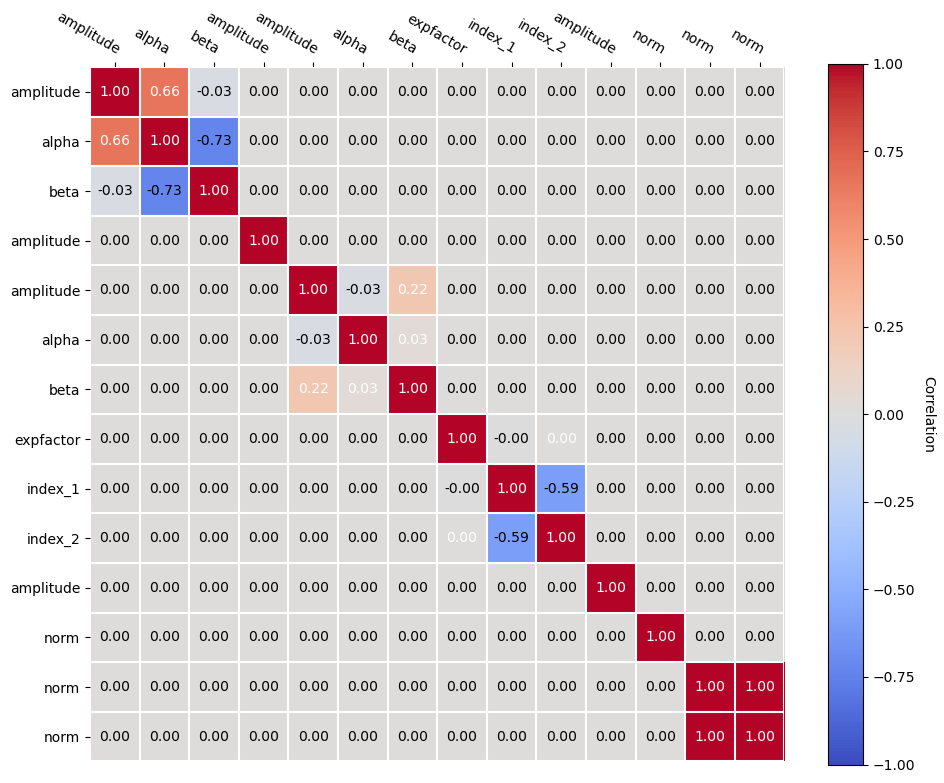

In [39]:
analysis.final_model.covariance.get_subcovariance(
    analysis.final_model.parameters.free_parameters
).plot_correlation()

In [40]:
print(analysis.fit_result)

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 1407
	total stat : 23866.34

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.



In [41]:
for m in analysis.datasets[0].models:
    print(m)

SkyModel

  Name                      : Crab
  Datasets names            : ['Fermi-LAT_FRONT', 'Fermi-LAT_BACK', 'LST-1']
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude                     :   1.19e-06   +/- 4.0e-08 1 / (cm2 s TeV)
    reference             (frozen):      0.010       TeV         
    alpha                         :      2.177   +/-    0.01             
    beta                          :      0.026   +/-    0.00             
    alpha_norm            (frozen):      1.000                   
    redshift              (frozen):      0.000                   
    lon_0                 (frozen):      3.221       rad         
    lat_0                 (frozen):     -0.101       rad         


SkyModel

  Name                      : 4FGL J0515.8+1527
  Datasets names            : ['Fermi-LAT_FRONT', 'Fermi-LAT_BACK']
  Spectral model type       : LogParabolaSpectralM

# Run the Flux Points Estimator step

In [42]:
%%time
analysis.run(["flux-points"])

Analysis Step flux-points completed


CPU times: user 8min 1s, sys: 3min, total: 11min 1s
Wall time: 11min 1s


In [43]:
for fp in analysis.flux_points:
    print(fp)

FluxPoints
----------

  geom                   : RegionGeom
  axes                   : ['lon', 'lat', 'energy']
  shape                  : (1, 1, 7)
  quantities             : ['norm', 'norm_err', 'norm_errn', 'norm_errp', 'norm_ul', 'ts', 'npred', 'npred_excess', 'stat', 'counts', 'success', 'stat_scan']
  ref. model             : compound
  n_sigma                : 1
  n_sigma_ul             : 2
  sqrt_ts_threshold_ul   : 2
  sed type init          : likelihood

FluxPoints
----------

  geom                   : RegionGeom
  axes                   : ['lon', 'lat', 'energy']
  shape                  : (1, 1, 20)
  quantities             : ['norm', 'norm_err', 'norm_errn', 'norm_errp', 'norm_ul', 'ts', 'npred', 'npred_excess', 'stat', 'counts', 'success', 'stat_scan']
  ref. model             : compound
  n_sigma                : 1
  n_sigma_ul             : 2
  sqrt_ts_threshold_ul   : 2
  sed type init          : likelihood



In [44]:
fermi_fpt = analysis.flux_points[0].to_table(sed_type="e2dnde", formatted=True)
fermi_fpt

e_ref,e_min,e_max,e2dnde,e2dnde_err,e2dnde_errp,e2dnde_errn,e2dnde_ul,ts,sqrt_ts,npred,npred_excess,stat,is_ul,counts,success,norm_scan,stat_scan
MeV,MeV,MeV,MeV2 / (cm2 s TeV),MeV2 / (cm2 s TeV),MeV2 / (cm2 s TeV),MeV2 / (cm2 s TeV),MeV2 / (cm2 s TeV),,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[2],float32[2],float64,bool,float64[2],bool,float64[11],float64[11]
177.828,100.000,316.228,1.547e+02,1.983e+01,2.027e+01,1.939e+01,1.961e+02,102.180,10.108,448.4903453631178 .. 454.15483863749733,70.67598 .. 70.67598,10489.427,False,415.0 .. 415.0,True,0.200 .. 5.000,10544.877 .. 10956.186
501.187,316.228,794.328,2.005e+02,2.599e+01,2.679e+01,2.520e+01,2.557e+02,146.735,12.113,278.24317542166796 .. 278.6131495192029,52.109287 .. 52.109287,7616.227,False,299.0 .. 299.0,True,0.200 .. 5.000,7694.262 .. 7855.493
1412.538,794.328,2511.887,2.229e+02,3.060e+01,3.181e+01,2.942e+01,2.891e+02,224.504,14.983,144.48477623335663 .. 146.35108984004398,35.158222 .. 35.158222,4600.150,False,163.0 .. 163.0,True,0.200 .. 5.000,4694.936 .. 4738.503
4466.836,2511.887,7943.283,5.858e+01,2.474e+01,2.822e+01,2.150e+01,1.223e+02,34.023,5.833,26.059625144338714 .. 26.333353389649627,2.9841256 .. 2.9841256,717.851,False,20.0 .. 20.0,True,0.200 .. 5.000,720.462 .. 810.750
14125.375,7943.283,25118.864,1.253e+02,6.285e+01,7.394e+01,5.299e+01,2.969e+02,41.110,6.412,6.791221727646771 .. 6.551748062150463,1.9902109 .. 1.9902109,220.787,False,6.0 .. 6.0,True,0.200 .. 5.000,227.988 .. 236.211
39810.717,25118.864,63095.736,2.100e+02,1.486e+02,1.855e+02,1.158e+02,6.610e+02,28.718,5.359,1.9425453915125726 .. 1.7630709339399326,0.9996695 .. 0.9996695,65.055,False,2.0 .. 2.0,True,0.200 .. 5.000,71.281 .. 66.494
112201.845,63095.736,199526.224,4.549e+02,3.217e+02,4.018e+02,2.509e+02,1.432e+03,34.165,5.845,1.3027598180088658 .. 1.1886702996518175,0.9994109 .. 0.9994109,68.219,False,2.0 .. 2.0,True,0.200 .. 5.000,78.463 .. 68.399


(1e-12, 1e-08)

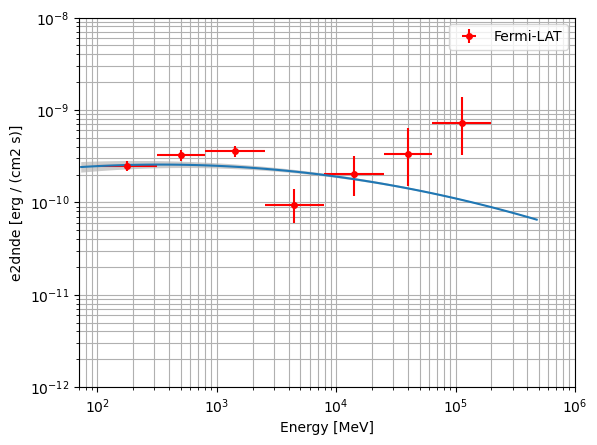

In [45]:
analysis.flux_points[0].plot(sed_type="e2dnde", color="red", label="Fermi-LAT")
analysis.datasets[0].models[config_main.target.source_name].spectral_model.plot(
    sed_type="e2dnde", energy_bounds=[70 * u.MeV, 0.5 * u.TeV]
)
analysis.datasets[0].models[config_main.target.source_name].spectral_model.plot_error(
    sed_type="e2dnde", energy_bounds=[70 * u.MeV, 0.5 * u.TeV]
)

plt.grid(which="both")
plt.legend()
plt.xlim(70, 1e6)
plt.ylim(1e-12, 1e-8)

In [46]:
lst_fpt = analysis.flux_points[1].to_table(sed_type="e2dnde", formatted=True)
lst_fpt

e_ref,e_min,e_max,e2dnde,e2dnde_err,e2dnde_errp,e2dnde_errn,e2dnde_ul,ts,sqrt_ts,npred,npred_excess,stat,is_ul,counts,success,norm_scan,stat_scan
TeV,TeV,TeV,TeV / (cm2 s),TeV / (cm2 s),TeV / (cm2 s),TeV / (cm2 s),TeV / (cm2 s),,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[1],float32[1],float64,bool,float64[1],bool,float64[11],float64[11]
0.013,0.010,0.016,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.000,False,0.0,False,0.200 .. 5.000,nan .. nan
0.020,0.016,0.025,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.000,False,0.0,False,0.200 .. 5.000,nan .. nan
0.032,0.025,0.040,1.008e-10,2.035e-11,2.037e-11,2.037e-11,1.416e-10,24.499,4.950,156057.00641838083,2753.0127,0.000,False,156057.0,True,0.200 .. 5.000,16.259 .. 323.249
0.050,0.040,0.063,5.825e-11,1.008e-11,1.006e-11,1.006e-11,7.838e-11,33.497,5.788,262147.08449339005,4174.1675,0.000,False,262147.0,True,0.200 .. 5.000,17.070 .. 1266.472
0.079,0.063,0.100,5.472e-11,6.655e-12,6.661e-12,6.661e-12,6.804e-11,67.498,8.216,150786.0281291065,4478.0557,0.000,False,150786.0,True,0.200 .. 5.000,36.104 .. 2195.256
0.126,0.100,0.158,5.387e-11,3.158e-12,3.158e-12,3.158e-12,6.019e-11,291.231,17.065,32964.05327981842,4237.0996,0.000,False,32964.0,True,0.200 .. 5.000,169.120 .. 6688.837
0.200,0.158,0.251,5.299e-11,1.607e-12,1.609e-12,1.606e-12,5.621e-11,1103.282,33.216,8043.077877523288,3673.12,0.000,False,8043.0,True,0.200 .. 5.000,693.694 .. 12432.294
0.316,0.251,0.398,4.774e-11,1.280e-12,1.283e-12,1.277e-12,5.031e-11,1461.643,38.231,3898.126681242128,2670.1665,0.000,False,3898.0,True,0.200 .. 5.000,954.136 .. 10415.122


(1e-12, 1e-08)

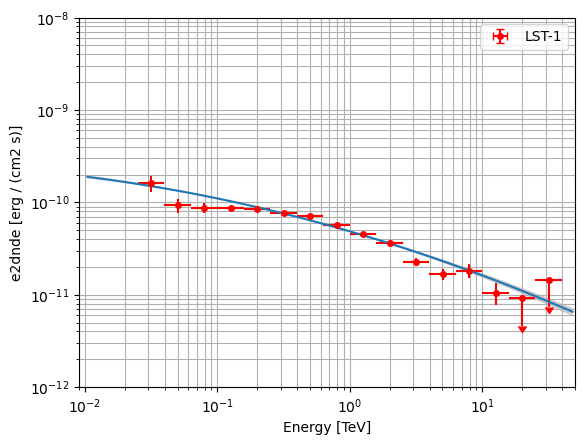

In [47]:
analysis.flux_points[1].plot(sed_type="e2dnde", color="red", label="LST-1")
analysis.datasets[1].models[0].spectral_model.plot(
    sed_type="e2dnde", energy_bounds=[10 * u.GeV, 50 * u.TeV]
)
analysis.datasets[1].models[0].spectral_model.plot_error(
    sed_type="e2dnde", energy_bounds=[10 * u.GeV, 50 * u.TeV]
)

plt.grid(which="both")
plt.legend()
plt.xlim(0.009, 50)
plt.ylim(1e-12, 1e-8)

# Final SED plot with all instruments

(1e-12, 1e-08)

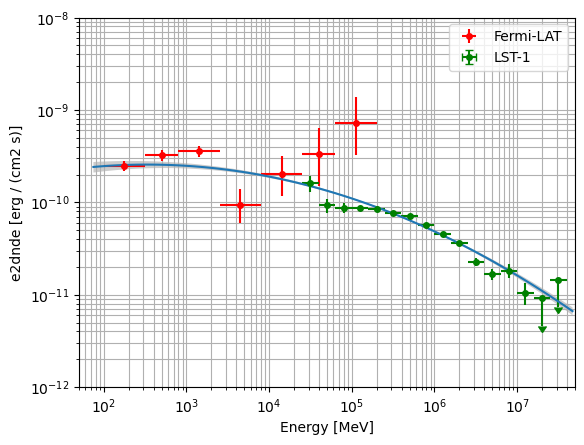

In [48]:
analysis.flux_points[0].plot(sed_type="e2dnde", color="red", label="Fermi-LAT")
analysis.flux_points[1].plot(sed_type="e2dnde", color="green", label="LST-1")

analysis.datasets[1].models[0].spectral_model.plot(
    sed_type="e2dnde", energy_bounds=[70 * u.MeV, 50 * u.TeV]
)
analysis.datasets[1].models[0].spectral_model.plot_error(
    sed_type="e2dnde", energy_bounds=[70 * u.MeV, 50 * u.TeV]
)

plt.grid(which="both")
plt.legend()
plt.xlim(50, 5e7)
plt.ylim(1e-12, 1e-8)

In [49]:
analysis.datasets[1].models[0].parameters.to_table()

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str10,float64,str14,float64,float64,float64,bool,bool,str1
spectral,amplitude,1.1853e-06,cm-2 s-1 TeV-1,4.042e-08,1.000e-13,1.000e-02,False,True,
spectral,reference,1.0000e-02,TeV,0.000e+00,1.000e-04,1.000e+02,True,False,
spectral,alpha,2.1766e+00,,1.341e-02,5.000e-01,5.000e+00,False,False,
spectral,beta,2.6059e-02,,2.344e-03,1.000e-06,1.000e+00,False,False,
spectral,alpha_norm,1.0000e+00,,0.000e+00,nan,nan,True,False,
spectral,redshift,0.0000e+00,,0.000e+00,nan,nan,True,False,
spatial,lon_0,3.2212e+00,rad,0.000e+00,nan,nan,True,False,
spatial,lat_0,-1.0096e-01,rad,0.000e+00,-9.000e+01,9.000e+01,True,False,
